#      IPL Data Analysis and Decision For Toss IPL

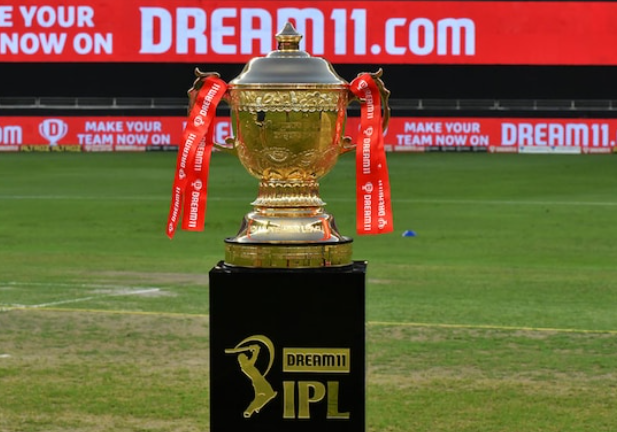

Indian Premier League is a cricket tournament held every year starting 2008. This kernel will be showing different analysis based on the records in the IPL History.

# Please **Upvote** this kernel and if you find it helpful please keep it in your Favourite Section.

# **OBJECTIVE**
1. Exploratory Data Analysis     
2. Toss Decision Prediction

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from keras.layers import Dense
from keras.models import Sequential
%matplotlib inline

# Importing dataset

In [ ]:
data=pd.read_csv('/kaggle/input/ipl-complete-dataset-20082020/IPL Matches 2008-2020.csv')
data1=pd.read_csv('/kaggle/input/ipl-complete-dataset-20082020/IPL Ball-by-Ball 2008-2020.csv')


In [ ]:
data.head()

In [ ]:
data1.head()

In [ ]:
data.describe()

In [ ]:
data1.describe()

In [ ]:
data.isnull().sum()

In [ ]:
data1.isnull().sum()

# Cleaning the data

In [ ]:
team1=data['team1']
team2=data['team2']
for x in range(len(data)):
    if team1[x]=="Rising Pune Supergiants":
        team1[x]="Rising Pune Supergiant"
    if team2[x]=="Rising Pune Supergiants":
        team2[x]="Rising Pune Supergiant"
data['team1']=team1
data['team2']=team2

city=data['city']
for x in range(len(data)):
    if city[x]=="Bangalore":
        city[x]="Bengaluru"
data['city']=city

data.venue.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},regex=True,inplace=True)

# 1.Top Ten Cities Used for IPL match 

In [ ]:
df=data['city'].fillna('')
top_ten_cities=df.value_counts()[:10]
top_ten_labels=top_ten_cities.index
fig, ax = plt.subplots(figsize=(10,8))
g=sns.barplot(x=top_ten_labels,y=top_ten_cities)
g.set_ylabel("No. of Matches")
g.set_xlabel("City")
g.set_title("Top Ten Cities Used for IPL match")

#  2.Team who has won most of the matches

In [ ]:
df=data['winner'].fillna('No Result')
most_matches_won=df.value_counts()[:15]
most_matches_won_team=most_matches_won.index
fig, ax = plt.subplots(figsize=(10,8))
g=sns.barplot(x=most_matches_won,y=most_matches_won_team)
g.set_ylabel("Team")
g.set_xlabel("No. of Matches")
g.set_title("Team who has won most of the matches")

# 3. Most Matches won on a neutral venue

In [ ]:
neutral=data[data['neutral_venue']==1][['winner','player_of_match']]
fig, ax = plt.subplots(figsize=(10,5))
g=sns.barplot(x=neutral['winner'].value_counts(),y=neutral['winner'].value_counts().index)
g.set_ylabel("Teams")
g.set_xlabel("No. of Matches")
g.set_title("Most Matches won on a neutral venue")

# 4.Toss decisions team wise

In [ ]:
plt.figure(figsize=(12,8))
ax=sns.countplot(y="toss_winner", data=data, orient="h", hue="toss_decision")
plt.xlabel("Toss decision")

# 5.Toss Win Match Win Stats

In [ ]:
toss_winner=data['toss_winner']
winner=data['winner']
won={'Toss Winner Wins Match':0,'Toss Winner Loses Match':0}
for x in range(len(data)):
    if toss_winner[x]==winner[x]:
        won['Toss Winner Wins Match']+=1
    else:
        won['Toss Winner Loses Match']+=1
li,li1=[],[]
for x,y in won.items():
    li.append(x)
    li1.append(y)
fig,(ax1,ax2)=plt.subplots(2,figsize=(7,8))
g=sns.barplot(x=li1,y=li,ax=ax1)
g.set_xlabel("No. of Matches")
g.set_title("No. of times Toss and Match won")

team_name=data['team1'].unique()
teamdic=dict.fromkeys(team_name,0)
for x in range(len(data)):
    if toss_winner[x]==winner[x]:
        for y in team_name:
            if y==toss_winner[x]:
                teamdic[y]+=1
li=[]
li1=[]
for x,y in teamdic.items():
    li.append(x)
    li1.append(y)
print(li,li1)
g1=sns.barplot(x=li1,y=li,ax=ax2)
g1.set_ylabel("Teams")
g1.set_xlabel("No. of Matches")
g1.set_title("No. of times Toss and Match won Teamwise")
plt.tight_layout()

# 6. Runs per ball stats

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
g=sns.barplot(x=data1['batsman_runs'].value_counts().index,y=data1['batsman_runs'].value_counts())
g.set_xlabel('Run per ball')
g.set_ylabel('Total scored in all the seasons')
g.set_title('Runs per ball for all seasons')


# 7. Type of Dismissals done

In [ ]:
df=data1['dismissal_kind'].fillna('')
dismissals=df.value_counts()[1:6]
fig, ax = plt.subplots(figsize=(10,5))
g=sns.barplot(x=dismissals.values,y=dismissals.index)
g.set_ylabel("Type of Dismissals")
g.set_xlabel("Number of Dismissals")
g.set_title("Most type of Dismissals done")


# 8. Best Bowler Stats

In [ ]:
top_ten_wicket_takers=data1[data1['is_wicket']==1]['bowler'].value_counts()[:10]
top_ten_dotball_bowled=data1[data1['batsman_runs']==0]['bowler'].value_counts()[:10]
fig,(ax1,ax2)=plt.subplots(2,figsize=(8,8))
g1=sns.barplot(x=top_ten_wicket_takers.values,y=top_ten_wicket_takers.index,ax=ax1)
g1.set_xlabel('Wickets taken')
g1.set_ylabel('Bowlers')
g1.set_title('Most wickets taken by bowlers')
g2=sns.barplot(x=top_ten_dotball_bowled.values,y=top_ten_dotball_bowled.index,ax=ax2)
g2.set_xlabel('Total dot balls bowled')
g2.set_ylabel('Bowled')
g2.set_title('Most dot balls bowled by a bowler')
plt.tight_layout()

# 9. Wides and NoBalls stats

In [ ]:
most_noballs_bowled=data1[data1['extras_type']=='noballs']['bowler'].value_counts()[:10]
most_wides_bowled=data1[data1['extras_type']=='wides']['bowler'].value_counts()[:10]
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
g1=sns.barplot(x=most_noballs_bowled.values,y=most_noballs_bowled.index,ax=ax1)
g1.set_ylabel('Bowlers')
g1.set_xlabel('Noballs Bowled')
g1.set_title('Most Noballs bowled by bowlers')
g2=sns.barplot(x=most_wides_bowled.values,y=most_wides_bowled.index,ax=ax2)
g2.set_ylabel('Bowlers')
g2.set_xlabel('Wides Bowled')
g2.set_title('Most Wides bowled by bowlers')
plt.tight_layout()

# 10.Best Batsman Stats

In [ ]:
top_ten_runs_scored=data1[data1['batsman_runs']!=0]['batsman'].value_counts()[:10]
top_ten_six_scored=data1[data1['batsman_runs']==6]['batsman'].value_counts()[:10]
top_ten_four_scored=data1[data1['batsman_runs']==4]['batsman'].value_counts()[:10]
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,5))
g1=sns.barplot(x=top_ten_runs_scored.values,y=top_ten_runs_scored.index,ax=ax1)
g1.set_xlabel('Runs scored')
g1.set_ylabel('Batsmans')
g1.set_title('Most runs scored by a Batsman')

g2=sns.barplot(x=top_ten_six_scored.values,y=top_ten_six_scored.index,ax=ax2)
g2.set_xlabel('Number of Sixes')
g2.set_ylabel('Batsman')
g2.set_title('Most Sixes scored by a batsman')

g3=sns.barplot(x=top_ten_four_scored.values,y=top_ten_four_scored.index,ax=ax3)
g3.set_xlabel('Number of Fours')
g3.set_ylabel('Batsman')
g3.set_title('Most Fours scored by a batsman')
plt.tight_layout()

# 11. Best Fielder Stats

In [ ]:
most_runouts=data1[data1['dismissal_kind']=='run out']['fielder'].value_counts()[:10]
most_catches=data1[data1['dismissal_kind']=='caught']['fielder'].value_counts()[:10]
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
g1=sns.barplot(x=most_runouts.values,y=most_runouts.index,ax=ax1)
g1.set_ylabel('Fielders')
g1.set_xlabel('No of Runouts')
g1.set_title('Most Runouts done by a fielder')
g2=sns.barplot(x=most_catches.values,y=most_catches.index,ax=ax2)
g2.set_ylabel('Fielders')
g2.set_xlabel('No of Catches')
g2.set_title('Most Catches done by a fielder')
plt.tight_layout()

# 12. Most Man of the Match award winners

In [ ]:
df=data['player_of_match'].fillna('')
top_ten_players=df.value_counts()[:10]
top_ten_labels=top_ten_players.index
fig, ax = plt.subplots(figsize=(10,5))
g=sns.barplot(x=top_ten_players,y=top_ten_labels)
g.set_ylabel("Players")
g.set_xlabel("No. of Matches")
g.set_title("Most won Player of the Match")

# Feature Engineering

In [ ]:
cities_venues=['city','venue']
for feature in cities_venues:
    temp=data[feature].value_counts()/len(data)
    temp_df=temp[temp>0.01].index
    data[feature]=np.where(data[feature].isin(temp_df),data[feature],'Rare Category')

In [ ]:
#Abu Dhabi dropped
location=pd.get_dummies(data['city'],drop_first=True)
data=pd.concat([data,location],axis=1)
#Fielding=1
data['toss_decision']=pd.get_dummies(data['toss_decision'],drop_first=True)
#Chennai Super Kings dropped
team1=pd.get_dummies(data['team1'],prefix='team1',drop_first=True)
team2=pd.get_dummies(data['team2'],prefix='team2',drop_first=True)
data=pd.concat([data,team1,team2],axis=1)

In [ ]:
toss_winner=data['toss_winner']
team1=data['team1']
li=[]
for x in range(len(data)):
    if toss_winner[x]==team1[x]:
        li.append(1)
    else:
        li.append(0)
data['toss_winner']=li

winner=data['winner']
li=[]
for x in range(len(data)):
    if winner[x]==team1[x]:
        li.append(1)
    else:
        li.append(0)
data['winner']=li

# Model Creation

In [ ]:
X=data[['neutral_venue',
        'Ahmedabad', 'Bengaluru', 'Centurion', 'Chandigarh', 'Chennai', 'Delhi',
       'Dharamsala', 'Dubai', 'Durban', 'Hyderabad', 'Indore', 'Jaipur',
       'Kolkata', 'Mumbai', 'Pune', 'Rajkot', 'Rare Category', 'Sharjah',
       'Visakhapatnam','toss_winner', 
        'team1_Deccan Chargers',
       'team1_Delhi Capitals', 'team1_Delhi Daredevils', 'team1_Gujarat Lions',
       'team1_Kings XI Punjab', 'team1_Kochi Tuskers Kerala',
       'team1_Kolkata Knight Riders', 'team1_Mumbai Indians',
       'team1_Pune Warriors', 'team1_Rajasthan Royals',
       'team1_Rising Pune Supergiant', 'team1_Royal Challengers Bangalore',
       'team1_Sunrisers Hyderabad', 'team2_Deccan Chargers',
       'team2_Delhi Capitals', 'team2_Delhi Daredevils', 'team2_Gujarat Lions',
       'team2_Kings XI Punjab', 'team2_Kochi Tuskers Kerala',
       'team2_Kolkata Knight Riders', 'team2_Mumbai Indians',
       'team2_Pune Warriors', 'team2_Rajasthan Royals',
       'team2_Rising Pune Supergiant', 'team2_Royal Challengers Bangalore',
       'team2_Sunrisers Hyderabad', 'winner']]
y=data['toss_decision']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
ann=Sequential()
ann.add(Dense(50,input_dim=48,activation='relu'))
ann.add(Dense(50,activation='relu'))
ann.add(Dense(1,activation='sigmoid'))
ann.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')


In [ ]:
ann.fit(X_train,y_train,epochs=100)

# Predicting Toss Decision To Win

In [ ]:
team1lis=['team1_Deccan Chargers', 'team1_Delhi Capitals',
       'team1_Delhi Daredevils', 'team1_Gujarat Lions',
       'team1_Kings XI Punjab', 'team1_Kochi Tuskers Kerala',
       'team1_Kolkata Knight Riders', 'team1_Mumbai Indians',
       'team1_Pune Warriors', 'team1_Rajasthan Royals',
       'team1_Rising Pune Supergiant', 'team1_Royal Challengers Bangalore',
       'team1_Sunrisers Hyderabad',]
team2lis=['team2_Deccan Chargers',
       'team2_Delhi Capitals', 'team2_Delhi Daredevils', 'team2_Gujarat Lions',
       'team2_Kings XI Punjab', 'team2_Kochi Tuskers Kerala',
       'team2_Kolkata Knight Riders', 'team2_Mumbai Indians',
       'team2_Pune Warriors', 'team2_Rajasthan Royals',
       'team2_Rising Pune Supergiant', 'team2_Royal Challengers Bangalore',
       'team2_Sunrisers Hyderabad']
citylis=['Ahmedabad', 'Bengaluru', 'Centurion', 'Chandigarh',
       'Chennai', 'Delhi', 'Dharamsala', 'Dubai', 'Durban', 'Hyderabad',
       'Indore', 'Jaipur', 'Kolkata', 'Mumbai', 'Pune', 'Rajkot',
       'Rare Category', 'Sharjah', 'Visakhapatnam']

def predict_toss_decision(neutral_venue,city,team1,team2,toss_winner):
    citydic=dict.fromkeys(citylis,0)
    team1dic=dict.fromkeys(team1lis,0)
    team2dic=dict.fromkeys(team2lis,0)
    result=[]
    result.append(neutral_venue)
    team1='team1_'+team1
    team2='team2_'+team2
#City
    for x in citylis:
        if x==city:
            citydic[city]=1
    if city not in citylis:
        citydic['Rare Category']=1
    result.extend(citydic.values())
#Teams
    for x in team1lis:
        if x==team1:
            team1dic[team1]=1
    for x in team2lis:
        if x==team2:
            team2dic[team2]=1
    result.append(toss_winner)
    result.extend(team1dic.values())
    result.extend(team2dic.values())
    
    result.append(0)
    bat=result
    predict_bat=ann.predict([[bat]])
    if predict_bat>=0.6:
        return "Field"
    else:
        return "Bat"

In [ ]:
predict_toss_decision(0,'Chennai','Chennai Super Kings','Delhi Capitals',1)

In [ ]:
predict_toss_decision(1,'Bengaluru','Royal Challengers Bangalore','Chennai Super Kings',0)

In [ ]:
X.shape